# EDA para información entregada por Sernapesca

#### Introducción
Este Noteboopk corresponde al análisis exploratorio del archivo enviado por sernapesca llamado "Ingresos 2021-2022.xlsx", el cual es extraido desde su platadorma interna denominada Reporteador.
 
Resumen:
* Tiene una dimensión de (64054, 22)
* Este archivo es una tabla con los ingresos a las plantas, entrega información de los centros de cultivo de origen.
* Es solo para la Región de Los Lagos.
* Tiene una temporalidad mensual que va desde 2021-01-01 hasta el 2022-06-01 con datos para todos los meses.
* Tiene varios tipos de especies.

### Import libreries

In [3]:
import logging
import subprocess
import os   
import pandas as pd
import seaborn as sns

### Reading file "Ingresos"

In [5]:
%%time
ingresos_raw = pd.read_excel("../data/datos_nelson/Ingresos 2021-2022.xlsx")

CPU times: total: 20.3 s
Wall time: 20.6 s


In [6]:
ingresos_raw.shape

(64054, 22)

In [7]:
ingresos_raw.head()

,ACS,Codigo Centro,Propietario,Nombre Sector,Tipo Cultivo,Tipo Agua,Año,Mes,Región,Provincia,...,Cod. Especie,Especie,Etapa,Unidades,Kilos,Origen,Cod. Origen,Nombre Origen,Tipo Especie,Sistema Ingreso
0,modif descanso 2,500014,RIO DULCE S.A.,"SAN ANTONIO, SEIS SECTORES",ACOPIO FLOTANTE,Mar,2021,1,10,Chiloé,...,311,TRUCHA ARCOIRIS,ADULTOS,24146.0,82555.0,Declarar Existencias de Especies de Cultivo co...,120191.0,AUSTRALIS MAR S.A.,PECES,SIFA
1,modif descanso 2,500014,RIO DULCE S.A.,"SAN ANTONIO, SEIS SECTORES",ACOPIO FLOTANTE,Mar,2021,1,10,Chiloé,...,311,TRUCHA ARCOIRIS,ADULTOS,24172.0,82644.0,Declarar Existencias de Especies de Cultivo co...,120191.0,AUSTRALIS MAR S.A.,PECES,SIFA
2,modif descanso 2,500014,RIO DULCE S.A.,"SAN ANTONIO, SEIS SECTORES",ACOPIO FLOTANTE,Mar,2021,1,10,Chiloé,...,301,SALMON DEL ATLANTICO,ADULTOS,13002.0,87113.0,Declarar Existencias de Especies de Cultivo co...,110340.0,COOKE AQUACULTURE CHILE S.A.,PECES,SIFA
3,ACS 7,500035,MAINSTREAM CHILE S.A.,"PUERTO FERNANDEZ, QUEMCHI",ACOPIO FLOTANTE,Mar,2021,1,10,Chiloé,...,301,SALMON DEL ATLANTICO,ADULTOS,36908.0,235.0,Declarar Existencias de Especies de Cultivo co...,110758.0,CERMAQ CHILE S.A.,PECES,SIFA
4,ACS 10 B,500019,ANTARFOOD S.A.,CANAL YAL,ACOPIO FLOTANTE,Mar,2021,1,10,Chiloé,...,302,SALMON PLATEADO O COHO,ADULTOS,9084.0,35.0,Declarar Existencias de Especies de Cultivo co...,110591.0,EXPORTADORA LOS FIORDOS LTDA.,PECES,SIFA


In [8]:
ingresos_raw.columns.to_list()

['ACS',
 'Codigo Centro',
 'Propietario',
 'Nombre Sector',
 'Tipo Cultivo',
 'Tipo Agua',
 'Año',
 'Mes',
 'Región',
 'Provincia',
 'Comuna',
 'N° Declaración',
 'Cod. Especie',
 'Especie',
 'Etapa',
 'Unidades',
 'Kilos',
 'Origen',
 'Cod. Origen',
 'Nombre Origen',
 'Tipo Especie',
 'Sistema Ingreso']

In [9]:
ingresos_raw.info

<bound method DataFrame.info of                     ACS  Codigo Centro  \
0      modif descanso 2         500014   
1      modif descanso 2         500014   
2      modif descanso 2         500014   
3                 ACS 7         500035   
4              ACS 10 B         500019   
...                 ...            ...   
64049               NaN         104092   
64050               NaN         104224   
64051               NaN         104224   
64052               NaN         103610   
64053               NaN         104061   

                                     Propietario  \
0                                 RIO DULCE S.A.   
1                                 RIO DULCE S.A.   
2                                 RIO DULCE S.A.   
3                          MAINSTREAM CHILE S.A.   
4                                 ANTARFOOD S.A.   
...                                          ...   
64049                  INVERSIONES COIHUIN LTDA.   
64050  CENTRO INNNOVACION AQUAINNOVO-BIOMAR S.A

In [10]:
ingresos_raw.describe()

,Codigo Centro,Año,Mes,Región,N° Declaración,Cod. Especie,Unidades,Kilos,Cod. Origen
count,64054.000000,64054.000000,64054.000000,64054.0,6.405400e+04,64054.000000,5.619500e+04,6.405400e+04,63083.000000
mean,206234.684423,2021.288631,5.426952,10.0,1.272773e+06,313.515300,3.484208e+04,2.398674e+04,94518.350824
std,174736.900218,0.453130,3.164148,0.0,1.593380e+05,53.348789,2.980422e+05,2.514386e+06,30047.561236
min,100009.000000,2021.000000,1.000000,10.0,1.606180e+05,122.000000,0.000000e+00,0.000000e+00,1.000000
25%,101851.000000,2021.000000,3.000000,10.0,1.265793e+06,301.000000,4.010000e+03,6.220000e+02,100205.000000
50%,103452.000000,2021.000000,5.000000,10.0,1.307780e+06,302.000000,8.881000e+03,1.301000e+03,101866.000000
75%,500014.000000,2022.000000,8.000000,10.0,1.366037e+06,302.000000,1.680000e+04,9.750000e+03,103941.000000
max,810276.000000,2022.000000,12.000000,10.0,1.423360e+06,495.000000,4.000000e+07,6.362615e+08,810248.000000


In [11]:
ingresos_raw.duplicated().sum()

3034

In [12]:
ingresos_raw.isnull().sum()

ACS                22195
Codigo Centro          0
Propietario            0
Nombre Sector         13
Tipo Cultivo           0
Tipo Agua              0
Año                    0
Mes                    0
Región                 0
Provincia              0
Comuna                 0
N° Declaración         0
Cod. Especie           0
Especie                0
Etapa                  0
Unidades            7859
Kilos                  0
Origen                 0
Cod. Origen          971
Nombre Origen        971
Tipo Especie           0
Sistema Ingreso        0
dtype: int64

In [13]:
ingresos_raw.dtypes

ACS                 object
Codigo Centro        int64
Propietario         object
Nombre Sector       object
Tipo Cultivo        object
Tipo Agua           object
Año                  int64
Mes                  int64
Región               int64
Provincia           object
Comuna              object
N° Declaración       int64
Cod. Especie         int64
Especie             object
Etapa               object
Unidades           float64
Kilos              float64
Origen              object
Cod. Origen        float64
Nombre Origen       object
Tipo Especie        object
Sistema Ingreso     object
dtype: object

In [14]:
ingresos_raw.columns.to_list()

['ACS',
 'Codigo Centro',
 'Propietario',
 'Nombre Sector',
 'Tipo Cultivo',
 'Tipo Agua',
 'Año',
 'Mes',
 'Región',
 'Provincia',
 'Comuna',
 'N° Declaración',
 'Cod. Especie',
 'Especie',
 'Etapa',
 'Unidades',
 'Kilos',
 'Origen',
 'Cod. Origen',
 'Nombre Origen',
 'Tipo Especie',
 'Sistema Ingreso']

In [45]:
ingresos_raw['Fecha'] = pd.to_datetime(ingresos_raw['Año'].astype(str) +'/'+ ingresos_raw['Mes'].astype(str), format="%Y/%m")
#ingresos_raw['Fecha'].unique().tolist()
ingresos_raw['Fecha'].astype(str).unique().tolist()

['2021-01-01',
 '2021-02-01',
 '2021-03-01',
 '2021-04-01',
 '2021-05-01',
 '2021-06-01',
 '2021-07-01',
 '2021-08-01',
 '2021-09-01',
 '2021-10-01',
 '2021-11-01',
 '2021-12-01',
 '2022-01-01',
 '2022-02-01',
 '2022-03-01',
 '2022-04-01',
 '2022-05-01',
 '2022-06-01']

In [15]:
#ingresos_raw['Especie'].unique().tolist()
ingresos_raw['Región'].unique().tolist()

[10]

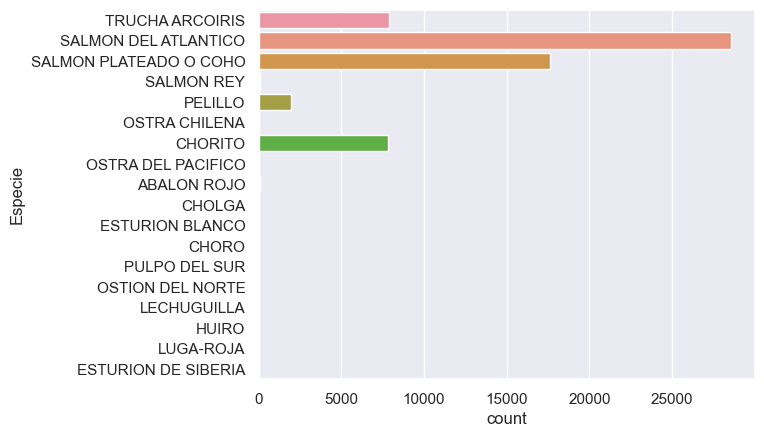

In [16]:
def count_clases(df, column_name):
    sns.set_theme(style="darkgrid")
    ax = sns.countplot(y=column_name, data=df)
    sns.set(rc = {'figure.figsize':(25,8)})
    #for item in ax.get_xticklabels():
    #    item.set_rotation(90)

count_clases(ingresos_raw,'Especie')

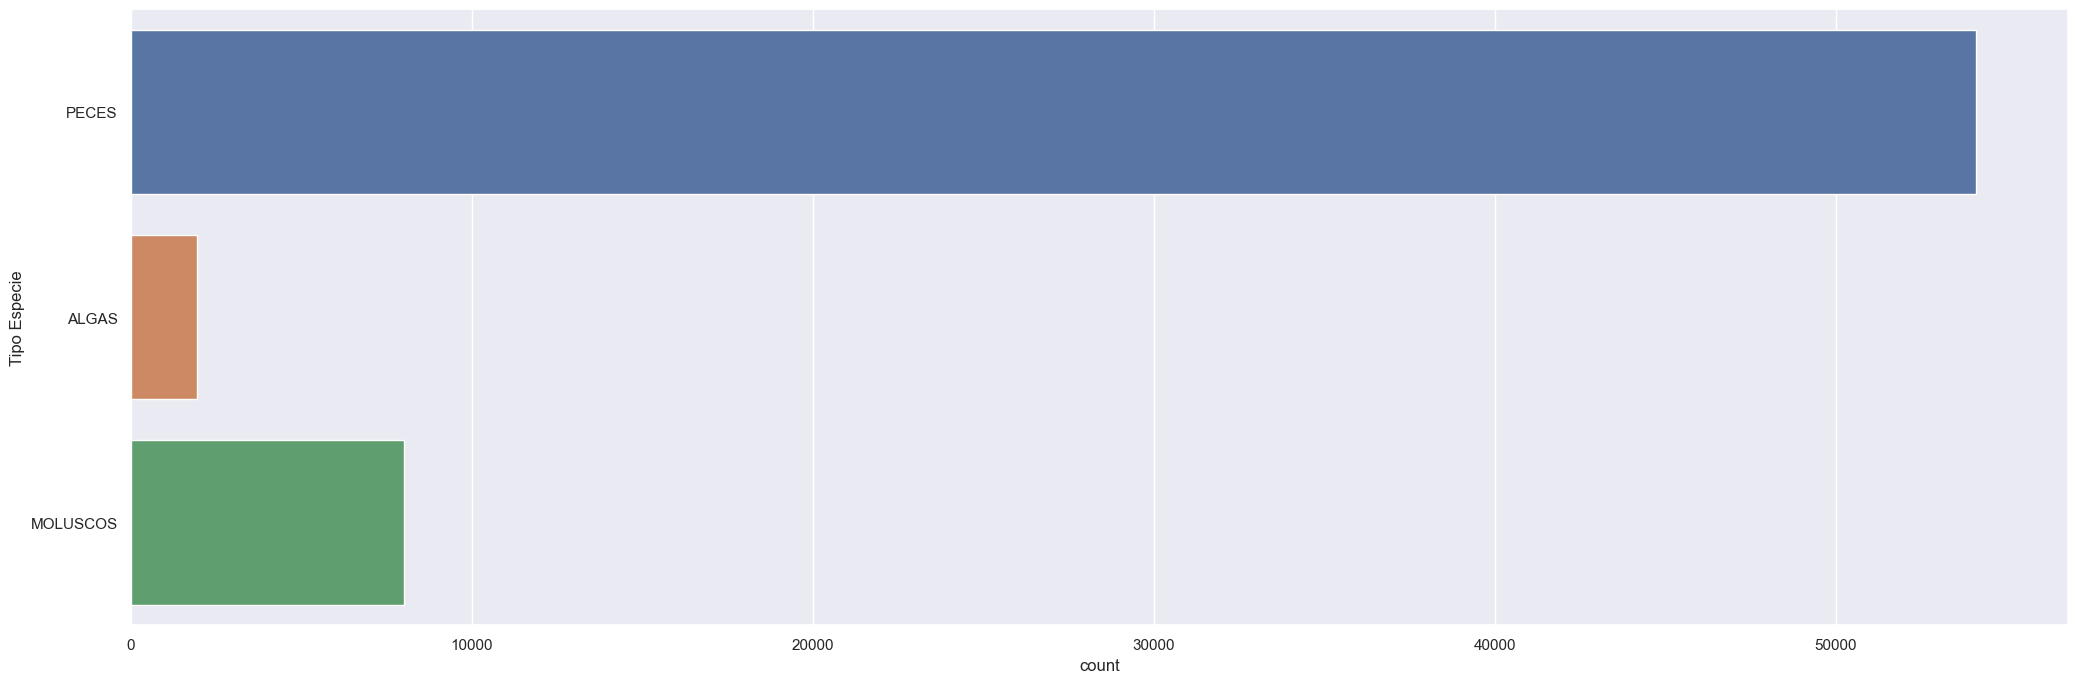

In [17]:
count_clases(ingresos_raw, 'Tipo Especie')

In [58]:
ingresos_raw['Origen'].unique().tolist()

['Declarar Existencias de Especies de Cultivo con Aut. Movimiento',
 'Declarar Existencias de Especies de Cultivo por Importación o  Autoabastecimiento',
 'Ingresos por diferencia',
 'Otros',
 'Centro de Cultivo',
 'Área de Manejo',
 'Comercializadora']

In [18]:
#len(ingresos_raw)
q_centros_ingresos = len(ingresos_raw['Codigo Centro'].unique().tolist())
q_centros_origen = len(ingresos_raw['Cod. Origen'].unique().tolist())
print(f'En total existen {q_centros_ingresos} lugares de ingresos y {q_centros_origen} lugares de origen ' )

En total existen 1211 lugares de ingresos y 935 lugares de origen 


In [19]:
ingresos_moluscos = ingresos_raw[ingresos_raw['Tipo Especie'] == 'MOLUSCOS']

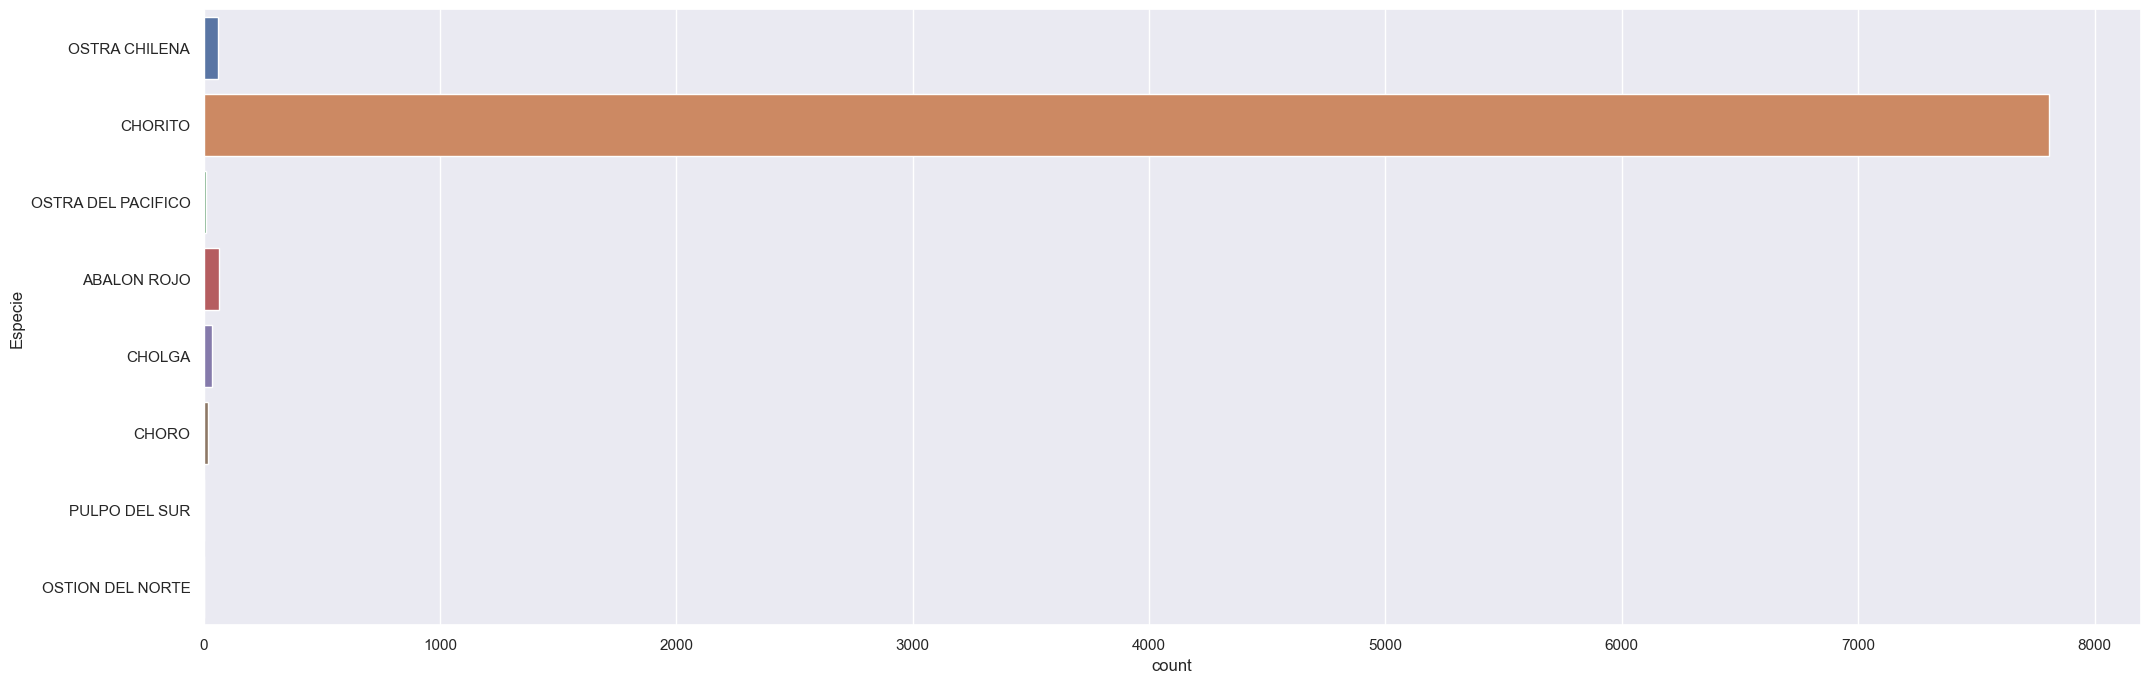

In [21]:
count_clases(ingresos_moluscos, 'Especie')

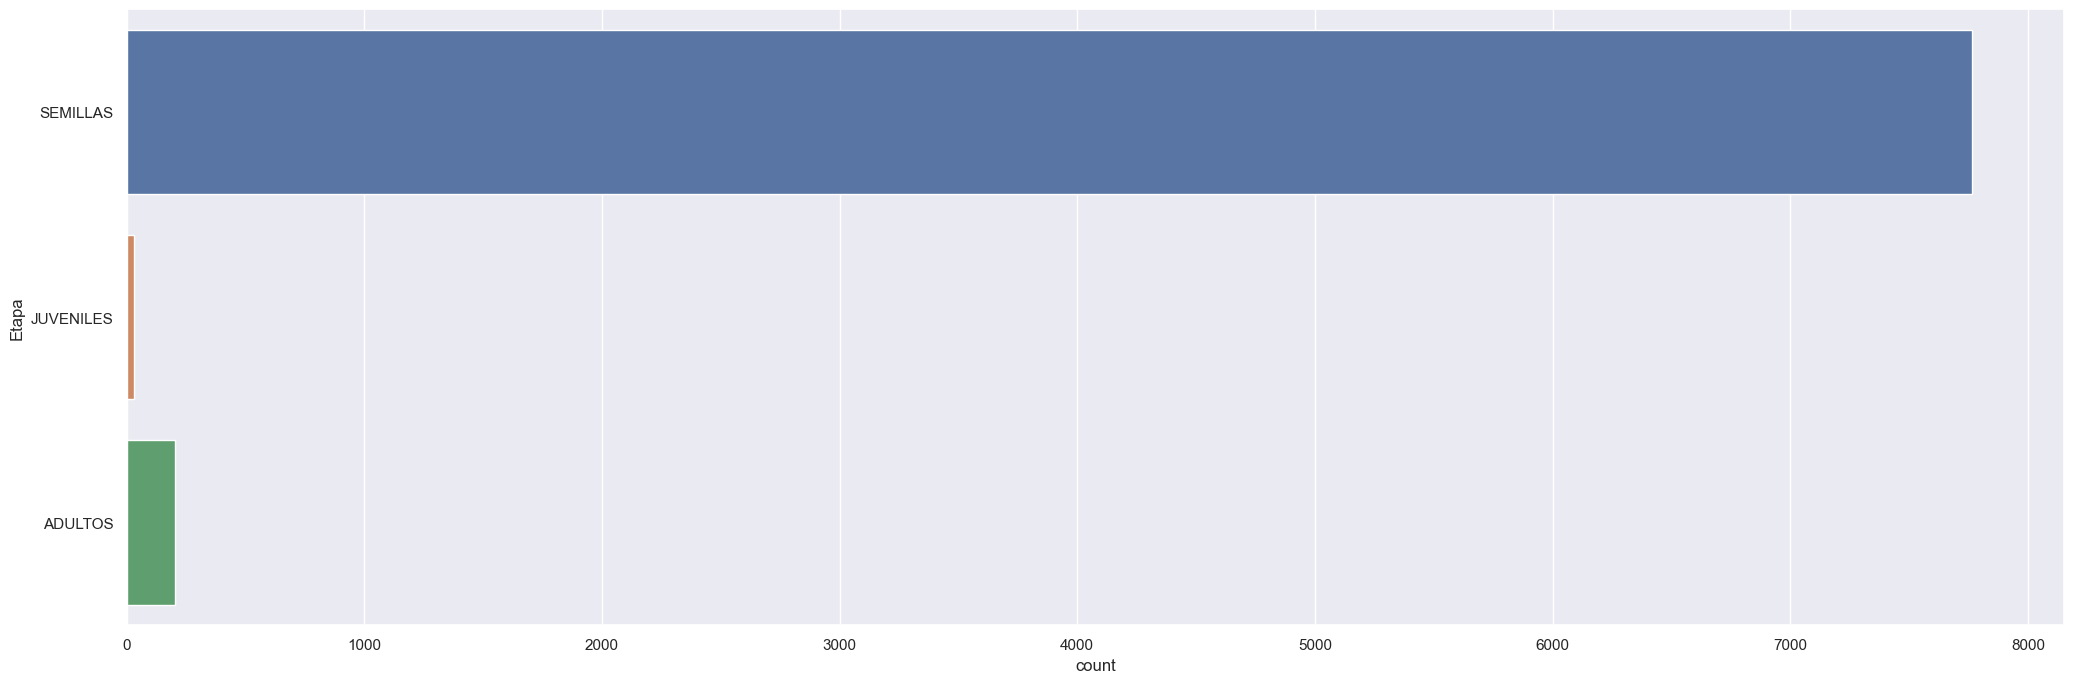

In [46]:
count_clases(ingresos_moluscos, 'Etapa')